The following are details of statistical comparisons performed by H. Passmore in partial completion of the Capstone 1 project for Springboard's Data Science Career Track Program. Code for these analyses is in Inferential_Statistics_Amazon_Working_Code.ipynb

__Assignment Details:__
At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

__Submission:__ Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

# Inferential Statistics for Capstone 1
_Amazon Book Reviews & Ratings Predictor_
***

## Summary of Project Data
The data for this ratings predictor project are Amazon book reviews for 729 different published books in the genre "Non-fiction Science and Textbooks". The dataset comprises 11546 reviews where many books are reviewed once, and some are reviewed by over 100 different reviewers. The highest review count per book is 382 with an average of 16 reviews per book.

Quantitative features of the dataset include: 

   * word count
   * character count  
   * estimated length of the longest word
   * percentage of words written by reviewer in UPPERCASE

Categorical features include: 

   * Overall star rating assigned by each reviewer, ranging from 1 to 5 stars (5 is the highest)
   * High/Medium/Low ratings groupings where 
       * High = 5-stars, (n = 7662)
       * Medium = 3 and 4-stars, (n = 2874)
       * Low = 1 and 2-stars, (n = 1010)
   * Ratings divided into binary groups: Five-star and not-five-star where
       * Five-star ratings (n = 7662)
       * All other ratings (n = 3884)
   * ratings over time (time series) for books with many reviews (>100)


Patterns of note: 
* Five-star ratings are the most common, 66% of this subset of reviews are 5-star reviews. This proprotion of highly rated books mirrors the proportion of five-star reviews in the source dataset of 22,507,155 book reviews (McAuley et al. 2015, He & McAuley 2016).
* The longest reviews are associated with the 5-star and 1-star ratings categories, respectively.
* Observations of the most frequently reviewed books indicates that high and low ratings are evenly distributed over time (no trend apparent).
* Most frequently reviewed books usually had more reviews early in the time series but some were reviewed more in the middle of the time series.
* The percent of words written in UPPERCASE is low for the most of the reviews.

## Analysis of Review Contents

Science textbook reviews contain words and phrases specific to the genre. First, I explored the most frequently used words across all reviews and ratings levels (Fig. 1). After omitting English stopwords the top 25 words used in the review text included words about books ('book', 'read', 'author'), words with positive meaning ('good', 'like', 'great', 'well'), as well as words specific to the genre ('science', 'world', 'information'). For this overview of word frequencies I employed 'RegexpTokenizer' with NLTK to tokenize the entire genre corpus (Loper & Bird 2002).


### Word frequencies across all Science Textbook reviews
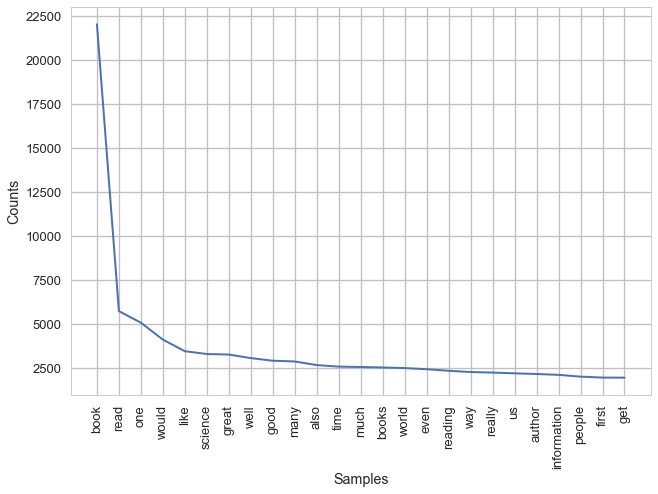
__Figure 1.__ The most frequent word used in 11546 Science Textbook reviews was 'book' which was more than three times more frequent than the next word, 'read' in these reviews. The top 25 words included 'science', 'world', and 'information'. These word frequencies were calculated with NLTK's tokenize_words with English stopwords removed.
***

Prior to vectorizing I divided the review data into training and test sets stratified by the binary ratings variable (0 for ‘not5 and 1 for ‘five). Training sample size for X and y is 8659. Testing sample size for X and y is 2887.

With scikit-learn I instantiated the Count Vectorizer with default parameters, fit the vectorizer to the training data vocabulary, and used it to create a document-term matrix. The sparse matrix dimensions are 8659 by 34080. 

Next, I instantiated scikit-learn’s Multinomial Naive Bayes classifier with default parameters and trained the model using the document-term matrix of the training vocabulary. The accuracy of the classifier before parameter tuning was 0.789. The area under the curve (ROC_AUC score) from the true labels and the predicted probabilities was 0.765. Additional steps to tune parameters with GridSearchCV and to fit pipelines with CountVectorizer with English stopwords, TF-IDF, and Multinomial Naive Bayes did not greatly increase the predictive ability of the model.

In order to explore the review vocabulary that is most predictive of either five-star or 1 to 4-star ratings I calculated the number of times each token (or word) appears in both categories of reviews. Since some tokens never occur in one or the other review type I added +1 to all token counts and converted the token counts into frequencies. To get a measure of whether a token is likely to occur in a five-star review I calculated the ratio of five-star frequencies to not-five-star frequencies. Sorted by this rate-ratio the higher rate-ratio values are the most five-star-like tokens and the smallest values are the most NOT-five-star-like. Words at the top of the sorted rate-ratio list include ‘loves’, ‘wonderful’, ‘highly’. Words at the bottom of the list include ‘lacks’, ‘annoying’ and three different forms of ‘disappoint’.

## Analysis of Review Text Characteristics
__Engineered Features for Inferential Statistics__ To enable comparisons between reviews associated with 5-star ratings compared to lower rated reviews I developed new features based on review text. For example, I calculated the number of words per review and the percentage of words written in uppercase per review. Below I describe statistical comparisons for these features between 5-star and other levels of ratings.

__Comparison of word counts for five-star and other ratings__To further explore patterns and differences in categorical features of the book review dataset I explored the distribution of review length (measured by word count) across the different levels of star ratings. Count data are often not normally distributed, and these data were predictibly skewed with fewer reviews being much longer than the majority. To make comparisons between the different star-ratings I first log-transformed the word count data. The log-transformation smoothed out the Q-Q plot. To compare review word counts for low and high rated books I used an independent two-sample t-test for unequal variances. The hypotheses of interest are:

__Null Hypothesis:__ Review length is equal for five-star and all other ratings for reviews. Specifically [5] vs. [1 to 4] stars.

__Alternative Hypothesis:__ Review lengths are not equal for five-star and all other rated reviews.

Results of this test on the log-transformed word counts indicate that the word count of all 1-star through 4-star rated reviews is significantly higher than 'five-star' rated reviews (t = 15.5, p = 0.00).

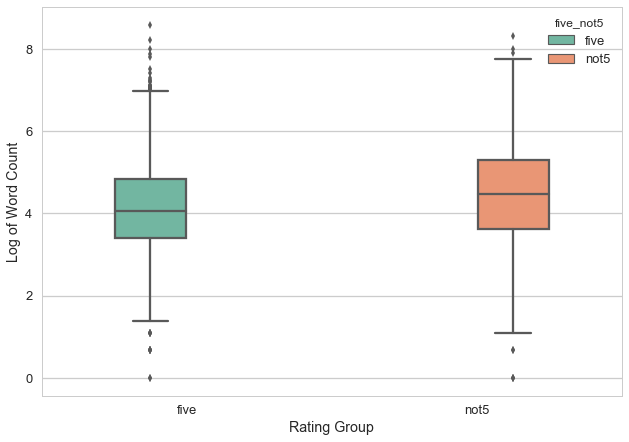
__Figure 2.__ Word counts for reviews with 1 to 4-stars are higher than word counts for 5-star reviews (t=15.5, p=0.0).
***

__Percentage of all-caps in review text__

__Null Hypothesis:__ Percentage of UPPERCASE words per review is equal for five-star and all other book ratings ([5] vs [1-4] star reviews).

__Alternative Hypothesis:__ Percentage of UPPERCASE words per review is not equal for five-star vs. all other ratings levels.

__Findings:__ The majority of book reviews have less than 10% UPPERCASE words (Fig. 3). Only 227 (2%) of the Science Textbook reviews have more than 10% UPPERCASE words. More of these reviews are in the five-star rating category (n=162), but the mean percentage between the groups are not significantly different. It seems that ALL CAPS was used more by reviewers writing highly positive reviews (five-star), but that this method of emphasizing text was not commonly used among the Science Textbook reviewers.

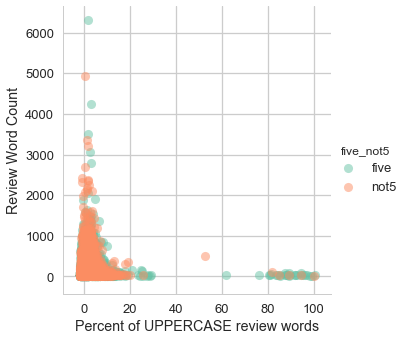

__Figure 3.__ The percent of words written by reviewers in uppercase is low for most reviews in our genre data. Low percentages are expected for normal text entry because I did not eliminate words like 'I' and 'A' for this calculation. For a small subset of reviews percent of uppercase words was higher, possibly for emphasis of either strong positive or negative sentiment. The average percentage of uppercase words did not differ significantly for five-star vs. lower rated review categories in this analysis.
***

## Summary of Findings

* Top word frequencies include genre specific words like 'science', 'world', and 'information'.
* Most common words from all reviews include positive words like 'great' and 'good'. The top 25 words did not include any obviously negative words. This is predictable given that the majority of reviews are 5-star reviews.
* A basic classification model using Multinomial Naive Bayes has 79% accuracy for testing data. The area under the ROC curve for the models was 0.765.
* There are statistical differences between reviews for high (5-star) and lower (1 to 4-stars) rated books in this genre. Log-transformed word counts are longer for reviews with lower ratings using an indepdenent two-sample t-test for unequal variances.
* The percentage of reviews comprised of ALL CAPITAL CHARACTERS, potentially used by reviewers for emphasis, is not commonly used by these Science Textbook reviewers. In the cases where uppercase words were a large percentage of the review text, the review was more likely to have a five-star rating.

__Conclusions:__ While reviews from all ratings levels are variable in quantitative and qualitative features, it is possible to distinguish between reviews of books given 5-stars by reviewers and reviews with lower ratings. Word count and probability of certain words occuring can be used to distinguish between these two classes of Science Textbook reviews.

### Sources:
He, Ruining and Julian McAuley. 2016. Ups and Downs: Modeling the Visual Evolution of Fashion Trends with One-Class Collaborative Filtering. In Proceedings of the 25th International Conference on World Wide Web (WWW '16). International World Wide Web Conferences Steering Committee, Republic and Canton of Geneva, Switzerland, 507-517. DOI: https://doi.org/10.1145/2872427.2883037

Loper, Edward and Steven Bird. 2002. NLTK: the Natural Language Toolkit. In Proceedings of the ACL-02 Workshop on Effective tools and methodologies for teaching natural language processing and computational linguistics - Volume 1 (ETMTNLP '02), Vol. 1. Association for Computational Linguistics, Stroudsburg, PA, USA, 63-70. DOI: https://doi.org/10.3115/1118108.1118117
 
McAuley, Julian, Christopher Targett, Qinfeng Shi, and Anton van den Hengel. 2015. Image-Based Recommendations on Styles and Substitutes. In Proceedings of the 38th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR '15). ACM, New York, NY, USA, 43-52. DOI: http://dx.doi.org/10.1145/2766462.2767755
***